In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

<ipython-input-1-69eaaec59c76>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [13]:
atac = pd.read_csv("https://sharehost.hms.harvard.edu/immgen/ImmGenATAC18_AllOCRsInfo.csv")

In [14]:
# get all of the rows that have chr12 in the chrom series
chr12 = atac[atac['chrom'] == 'chr12']

In [15]:
chr12

,ImmGenATAC1219.peakID,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,genes.within.100Kb,LTHSC.34-.BM,LTHSC.34+.BM,...,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,DC.103+11b+.SI,DC.103+11b-.SI,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
95901,ImmGenATAC1219.peak_95902,chr12,3017236,0.00,0.34,NaN,NaN,NaN,0.41,0.71,...,1.34,0.10,1.75,0.47,0.11,1.47,0.34,1.92,1.64,0.50
95902,ImmGenATAC1219.peak_95903,chr12,3018721,0.00,0.64,NaN,NaN,NaN,0.41,0.10,...,1.26,0.54,3.17,0.11,0.51,0.50,0.75,0.53,0.51,0.11
95903,ImmGenATAC1219.peak_95904,chr12,3098366,0.03,2.14,1.0,NaN,NaN,4.37,2.57,...,2.42,0.54,3.48,1.87,2.19,4.29,1.75,0.52,4.86,3.64
95904,ImmGenATAC1219.peak_95905,chr12,3126285,0.00,0.36,NaN,NaN,NaN,0.41,0.10,...,0.10,0.72,0.71,1.40,0.52,1.27,0.34,0.14,1.23,0.53
95905,ImmGenATAC1219.peak_95906,chr12,3173511,0.01,4.87,1.0,NaN,Rab10os,33.01,20.06,...,0.44,0.10,0.59,0.11,0.11,1.10,0.75,0.52,2.14,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118461,ImmGenATAC1219.peak_118462,chr12,120004497,0.11,1.95,1.0,NaN,Tmem196,0.41,2.57,...,0.77,0.78,0.23,1.79,0.11,1.96,0.88,1.33,0.51,7.81
118462,ImmGenATAC1219.peak_118463,chr12,120006030,0.00,4.13,1.0,NaN,Tmem196,0.41,2.57,...,0.44,0.54,0.71,0.47,0.11,26.80,0.26,0.11,1.57,17.72
118463,ImmGenATAC1219.peak_118464,chr12,120014727,0.43,1.01,NaN,NaN,Tmem196,0.41,0.10,...,1.21,1.41,0.66,0.11,1.75,1.47,0.88,0.57,2.17,0.53
118464,ImmGenATAC1219.peak_118465,chr12,120023437,0.37,0.73,NaN,NaN,Tmem196,4.37,0.10,...,0.44,1.38,1.55,0.53,0.51,0.92,1.26,0.90,0.51,1.43


In [16]:
b_cells = ['proB.CLP.BM', 'proB.FrA.BM', 'proB.FrBC.BM', 
           'preB.FrD.BM', 'B.FrE.BM', 'B.T1.Sp', 
           'B.T2.Sp', 'B.T3.Sp', 'B.Fo.Sp', 
           'B.mem.Sp', 'B.GC.CB.Sp', 'B.GC.CC.Sp', 
           'B.PB.Sp', 'B.PC.Sp', 'B.PC.BM']

In [17]:
chr12 = chr12[['Summit', 'TSS', 'genes.within.100Kb']+b_cells]

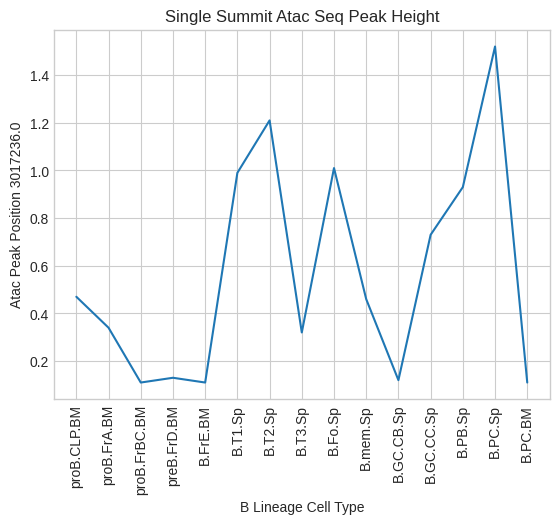

In [7]:
plt.xticks(range(len(b_cells)), b_cells, rotation='vertical')
# use only the first row which is the location of the peak
plt.plot(b_cells, chr12.iloc[0][1:])
# add y axis label for the location of the peak 
plt.ylabel("Atac Peak Position {}".format(chr12.iloc[0][0]))
plt.xlabel("B Lineage Cell Type")
plt.title("Single Summit Atac Seq Peak Height")
plt.show()

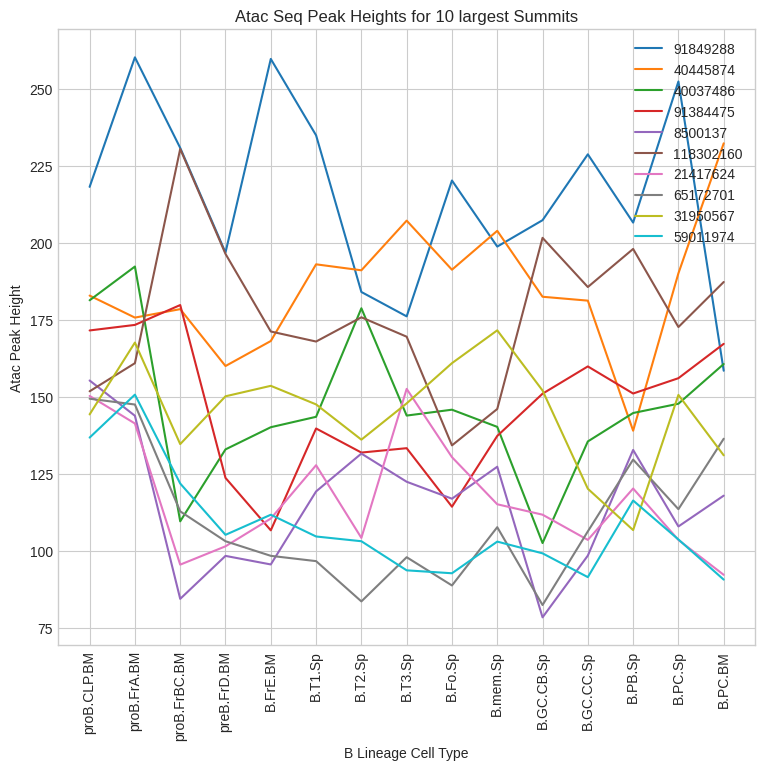

In [8]:
plt.figure(figsize=(9,8))
plt.xticks(range(len(b_cells)), b_cells, rotation='vertical')
largest = chr12.nlargest(10, b_cells, keep='all')
for i in range(largest.shape[0]):
    plt.plot(b_cells, largest.iloc[i][1:], label=int(largest.iloc[i][0]))
plt.legend(loc="upper right")
plt.ylabel("Atac Peak Height")
plt.xlabel("B Lineage Cell Type")
plt.title("Atac Seq Peak Heights for 10 largest Summits")
plt.show()

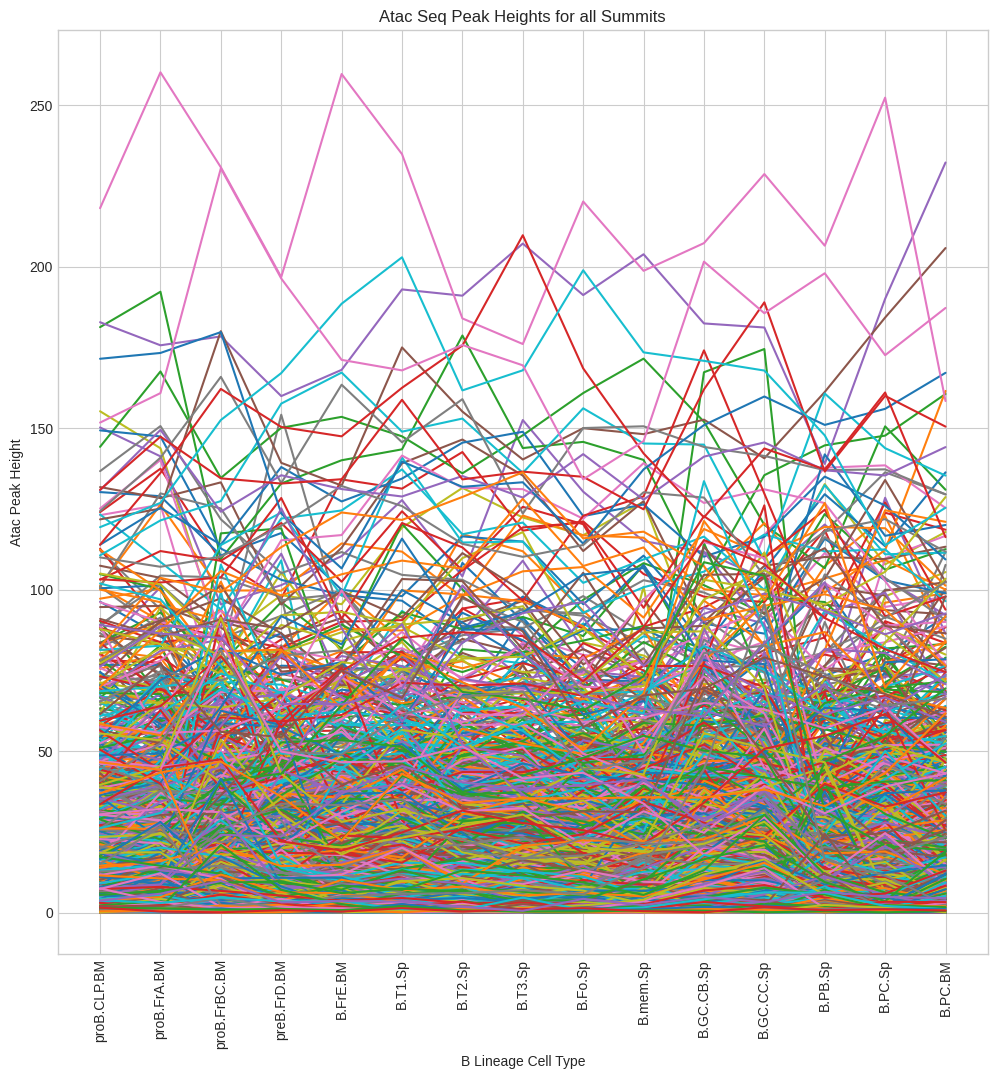

In [9]:
plt.figure(figsize=(12,12))
plt.ylabel("Atac Peak Height")
plt.xlabel("B Lineage Cell Type")
plt.title("Atac Seq Peak Heights for all Summits")
plt.xticks(range(len(b_cells)), b_cells, rotation='vertical')
for i in range(chr12[b_cells].shape[0]):
    plt.plot(b_cells, chr12.iloc[i][1:])
plt.show()

In [19]:
# calculate the median value of each row starting with the 2nd column
chr12['median'] = chr12.iloc[:, 1:].median(axis=1)

<ipython-input-19-661888550ea4>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  chr12['median'] = chr12.iloc[:, 1:].median(axis=1)
<ipython-input-19-661888550ea4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chr12['median'] = chr12.iloc[:, 1:].median(axis=1)
